In [19]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

In [2]:
data = np.loadtxt('../data/fiji.txt')

# Problem 1a {-}

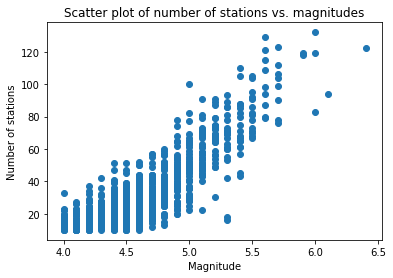

In [8]:
stations = data[:,5]
magnitudes = data[:,4]
plt.scatter(magnitudes, stations)
plt.title('Scatter plot of number of stations vs. magnitudes')
plt.xlabel('Magnitude')
plt.ylabel('Number of stations')
plt.show()

# Problem 1b {-}

In [20]:
n = len(data)

def compute_plugin_estimate(X, Y):
    # Compute each component separately

    muX = np.mean(X)
    muY = np.mean(Y)

    cov = 0

    for x in X:
        xDiff = x - muX
        for y in Y:
            cov += xDiff * (y - muY)

    cov /= n ** 2

    varX = sum((X - muX) ** 2) / n
    varY = sum((Y - muY) ** 2) / n

    return cov / ((varX * varY) ** (1 / 2))

thetaHat = compute_plugin_estimate(magnitudes, stations)

print('Plug-in estimate of theta = ', thetaHat)

Plug-in estimate of theta =  6.7086626842787235e-18


# Problem 1c {-}

In [29]:
B = 10 ** 3

estimates = np.zeros(B)

for i in range(B):
    row = np.random.choice(n, n, replace=True)
    X = data[row,4]
    Y = data[row,5]
    estimates[i] = compute_plugin_estimate(X, Y)
    
# Bootstrap estimate of standard error of theta hat
bootstrapMean = np.mean(estimates)
seHat = np.mean((estimates - bootstrapMean) ** 2) ** (1 / 2)
print('Bootstrap estimate of the standard error of theta hat = ', seHat)

Bootstrap estimate of the standard error of theta hat =  1.3237758811697228e-17


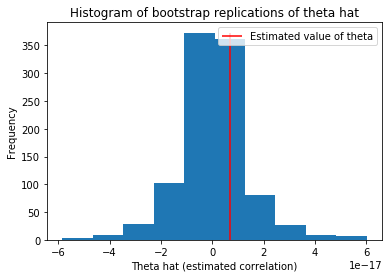

In [30]:
# Plot histogram
plt.hist(estimates)
plt.title('Histogram of bootstrap replications of theta hat')
plt.ylabel('Frequency')
plt.xlabel('Theta hat (estimated correlation)')
plt.vlines(thetaHat, 0, max(np.histogram(estimates)[0]), colors='r', label='Estimated value of theta')
plt.legend()
plt.show()

# Problem 1d {-}

In [36]:
# 0.025th quantile of standard normal distribution
z = norm.ppf(0.975)
a = thetaHat - z * seHat
b = thetaHat + z * seHat
print('Normal 95% confidence interval for theta = [{}, {}]'.format(a, b))

Normal 95% confidence interval for theta = [-1.9236867822675587e-17, 3.2654193191233034e-17]


In [34]:
# Using approximate pivot (theta Hat - theta)
a = 2 * thetaHat - np.quantile(estimates, 0.975)
b = 2 * thetaHat - np.quantile(estimates, 0.025)
print('Pivotal 95% confidence interval for theta = [{}, {}]'.format(a, b))

Pivotal 95% confidence interval for theta = [-1.5035483364270738e-17, 4.0110643455874414e-17]


# Problem 3b {-}